In [1]:
import datetime
import matplotlib.pyplot as plt
import nltk
import joblib
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import plot_confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import tree
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
pd.set_option('display.max_rows', 10000)

In [2]:
def validate(date_text):
    try:
        datetime.datetime.strptime(date_text, '%Y-%m-%d')
    except ValueError:
        raise ValueError("Incorrect data format, should be YYYY-MM-DD")

In [3]:
italian_stemmer = SnowballStemmer('italian')
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([italian_stemmer.stem(w) for w in analyzer(doc)])

In [4]:
def search_Vaxine_Period(df, vaxine=None, start_date = "2021-02-01", end_date = "2021-05-31"):
    
    validate(start_date)
    validate(end_date)
       
    if vaxine == None:
        return test_set[(test_set['timestamp'] > start_date) & (test_set['timestamp'] < end_date)]    
    else:
        vaxine = vaxine.lower()
        return test_set[(test_set['timestamp'] > start_date) & (test_set['timestamp'] < end_date) & (test_set["tweet"].str.match(vaxine))]

In [5]:
#Load classifier
clf = joblib.load('InitialModel.pkl')

In [6]:
#Load data and a short phase of preprocess
test_set = pd.read_csv("test_set.csv",sep=',',usecols=['timestamp','username','tweet'])
print(f"Number of tweets: {len(test_set)}")
test_set.drop_duplicates(subset=['tweet'])
print(f"Number of tweets: {len(test_set)}")

Number of tweets: 35296
Number of tweets: 35296


In [7]:
news = []
with open('AccountToDelete.txt') as f:
    for line in f:
        news.append(line.strip())

In [8]:
indexNames = test_set[ test_set['username'].isin(news)].index
test_set.drop(indexNames, inplace=True)
print(f"Number of tweets: {len(test_set)}")

Number of tweets: 33602


In [9]:
#Vaxine used
#vaxine = "astrazeneca"
#vaxine = "pfizer"
#vaxine = "moderna"
#vaxine = "sputnik"
#vaxine = "johnson"

In [10]:
#Search tweet on period and on particural vaxine
data = search_Vaxine_Period(test_set,start_date="2021-02-01",end_date="2021-02-28").copy()

In [19]:
#Adopting the text classifier on a limited set of data
data["label"]= clf.predict(data.tweet)
data = data.sort_values(by=['label'], ascending=False)
data.to_csv("tweetFiltered_labeled.csv")

In [20]:
#Count label
label=[0,0,0]
indexNames = data[data['label']=="label"].index
data.drop(indexNames, inplace=True)
data.label=data.label.astype(int)

for w in data.label:
    if w == 0:
        label[0] = label[0] +1
    if w == 1:
        label[1] = label[1] +1
    if w == 2:
        label[2] = label[2] +1

print("dataset len: " + str(len(data)))
print("class 0 len: " + str(label[0]))
print("class 1 len: " + str(label[1]))
print("class 2 len: " + str(label[2]))

dataset len: 3927
class 0 len: 14
class 1 len: 62
class 2 len: 3851


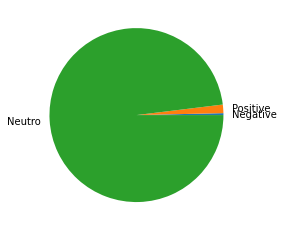

In [21]:
#Pie-chart
classes = ["Negative", "Positive", "Neutro"]
plt.pie(label, labels=classes)
plt.show()